<a href="https://www.kaggle.com/code/owais51/marks-of-students-linear?scriptVersionId=117246908" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
data=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#data.drop(columns=['gender'],inplace=True)
#data.drop(columns=['race/ethnicity'],inplace=True)
#data=data[data['parental level of education']!="bachelor's degree"]
#data=data[data['parental level of education']!="some college"]
#data.drop(columns=['parental level of education'],inplace=True)
#data.drop(columns=['lunch'],inplace=True)
#data=data[data['test preparation course']!="none"]
#data.drop(columns=['test preparation course'],inplace=True)

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
x=data.drop(columns=['writing score'])
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99
996,male,group C,high school,free/reduced,none,62,55
997,female,group C,high school,free/reduced,completed,59,71
998,female,group D,some college,standard,completed,68,78


In [7]:
y=data['writing score']
y.head()

0    74
1    88
2    93
3    44
4    75
Name: writing score, dtype: int64

In [8]:
import seaborn as sns

In [9]:
#from sklearn.preprocessing import PowerTransformer
#from sklearn.compose import make_column_transformer
#from sklearn import set_config
#trans=make_column_transformer((PowerTransformer(method='box-cox'),num_cols),remainder='passthrough')
#set_config(display='diagram')
#trans

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

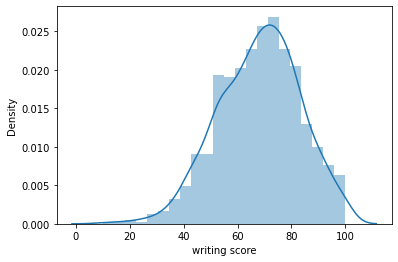

In [10]:
import seaborn as sns
sns.distplot(data['writing score'])

In [11]:
#from sklearn.preprocessing import FunctionTransformer
#=FunctionTransformer(np.log1p)
#data['writing score']=f.fit_transform(data[['writing score']])
#sns.distplot(data['writing score'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

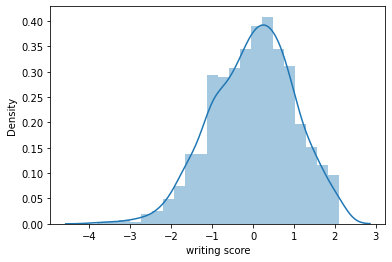

In [12]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
data['writing score']=s.fit_transform(data[['writing score']])
sns.distplot(data['writing score'])

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [14]:
x.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [15]:
nom_cols=[2,3]
ord_cols=[0,1,4]
num_cols=[5,6]

In [16]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans=make_column_transformer((OneHotEncoder(sparse='false'),nom_cols),(OrdinalEncoder(),ord_cols),(PowerTransformer(),num_cols),remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse='false'),
                                 [2, 3]),
                                ('ordinalencoder', OrdinalEncoder(), [0, 1, 4]),
                                ('powertransformer', PowerTransformer(),
                                 [5, 6])])

In [17]:
from sklearn.linear_model import LinearRegression
algo=LinearRegression()
algo


LinearRegression()

In [18]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trans,algo)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('linearregression', LinearRegression())])

In [19]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('linearregression', LinearRegression())])

In [20]:
pred=pipe.predict(x_test)
pred

array([ 69.7734375,  72.140625 ,  70.6875   ,  69.6875   ,  45.1484375,
        35.1796875,  79.515625 ,  71.0546875,  72.5390625,  72.2421875,
        56.       ,  57.078125 ,  94.6640625,  83.6640625,  68.4921875,
        66.09375  ,  88.5625   ,  74.125    ,  50.1796875,  83.5      ,
        49.6484375,  52.7890625,  42.2578125,  62.8828125, 100.703125 ,
        60.109375 ,  86.46875  ,  46.3671875,  86.390625 ,  57.5625   ,
        60.296875 ,  66.1328125,  75.7890625,  99.703125 ,  79.15625  ,
        81.328125 ,  65.0625   ,  60.875    ,  60.328125 ,  46.953125 ,
        72.03125  ,  51.3984375,  84.984375 ,  62.6640625,  85.734375 ,
        83.59375  ,  63.46875  ,  77.0078125,  65.7421875,  58.1171875,
        88.5859375,  52.078125 ,  45.6171875,  48.1640625,  94.578125 ,
        56.6484375,  48.5390625,  86.6640625,  71.8515625,  73.7890625,
        83.609375 ,  73.1875   ,  54.1015625,  43.8046875,  63.6171875,
        61.9921875,  70.0234375,  59.34375  ,  61.90625  ,  43.2

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)*100

1434.0924072265625

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

In [23]:
algo1=LinearRegression()
algo2=DecisionTreeRegressor()

In [24]:
vote=VotingRegressor(estimators=[('x1',algo),('x2',algo1),('x3',algo2)],n_jobs=-1,verbose=True)

In [25]:
pipe_1=make_pipeline(trans,vote)
pipe_1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x1', LinearRegression()),
                                             ('x2', LinearRegression()),
                                             ('x3', DecisionTreeRegressor())],
                                 n_jobs=-1, verbose=True))])

In [26]:
pipe_1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x1', LinearRegression()),
                                             ('x2', LinearRegression()),
                                             ('x3', DecisionTreeRegressor())],
                                 n_jobs=-1, verbose=True))])

In [27]:
pred_1=pipe_1.predict(x_test)
pred_1

array([ 68.84895833,  73.09375   ,  73.79166667,  70.45833333,
        46.765625  ,  36.11979167,  78.34375   ,  71.36979167,
        73.02604167,  71.49479167,  55.66666667,  57.05208333,
        94.77604167,  83.109375  ,  66.99479167,  64.72916667,
        89.04166667,  75.41666667,  48.453125  ,  82.        ,
        47.09895833,  51.52604167,  41.83854167,  61.921875  ,
       100.46875   ,  64.40625   ,  88.64583333,  45.24479167,
        89.26041667,  56.04166667,  62.53125   ,  64.08854167,
        75.19270833,  99.80208333,  82.10416667,  81.55208333,
        64.04166667,  61.91666667,  58.88541667,  47.63541667,
        69.6875    ,  51.93229167,  85.32291667,  61.77604167,
        86.48958333,  82.72916667,  63.64583333,  78.33854167,
        64.828125  ,  61.078125  ,  86.390625  ,  52.71875   ,
        47.078125  ,  49.44270833,  94.71875   ,  51.43229167,
        47.359375  ,  86.109375  ,  71.234375  ,  72.52604167,
        82.73958333,  73.125     ,  53.06770833,  44.20

In [28]:
mean_squared_error(pred_1,y_test)*100

1470.7459309895833

In [29]:
from sklearn.model_selection import GridSearchCV
params_1={'max_depth':[None,2,5,10],'min_samples_split':[2,10,100]}
pipe_a=make_pipeline(trans,GridSearchCV(algo2,params_1,verbose=3,refit=True))
pipe_a

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeRegressor(),
                              param_grid={'max_depth': [None, 2, 5, 10],
                                          'min_samples_split': [2, 10, 100]},
                              verbose=3))])

In [30]:
pipe_a.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, min_samples_split=2 .............................
[CV] . max_depth=None, min_samples_split=2, score=0.880, total=   0.0s
[CV] max_depth=None, min_samples_split=2 .............................
[CV] . max_depth=None, min_samples_split=2, score=0.856, total=   0.0s
[CV] max_depth=None, min_samples_split=2 .............................
[CV] . max_depth=None, min_samples_split=2, score=0.844, total=   0.0s
[CV] max_depth=None, min_samples_split=2 .............................
[CV] . max_depth=None, min_samples_split=2, score=0.835, total=   0.0s
[CV] max_depth=None, min_samples_split=2 .............................
[CV] . max_depth=None, min_samples_split=2, score=0.817, total=   0.0s
[CV] max_depth=None, min_samples_split=10 ............................
[CV]  max_depth=None, min_samples_split=10, score=0.894, total=   0.0s
[CV] max_depth=None, min_samples_split=10 ............................
[CV]  max_depth=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeRegressor(),
                              param_grid={'max_depth': [None, 2, 5, 10],
                                          'min_samples_split': [2, 10, 100]},
                              verbose=3))])

In [31]:
pred_2=pipe_a.predict(x_test)
pred_2

array([64.3       , 77.17142857, 71.22535211, 71.22535211, 45.4       ,
       34.15384615, 78.10714286, 71.03571429, 71.22535211, 71.22535211,
       49.27777778, 59.24242424, 91.        , 85.36585366, 67.65517241,
       64.3       , 85.36585366, 75.24242424, 49.27777778, 80.8       ,
       49.08108108, 49.08108108, 42.22222222, 59.24242424, 97.        ,
       64.3       , 91.        , 49.08108108, 91.        , 55.76190476,
       64.3       , 65.63636364, 78.10714286, 99.8       , 85.36585366,
       82.76190476, 64.3       , 63.90909091, 59.24242424, 49.08108108,
       68.34782609, 49.27777778, 85.36585366, 64.3       , 91.        ,
       82.76190476, 67.65517241, 75.24242424, 64.3       , 63.90909091,
       85.36585366, 55.76190476, 45.4       , 49.08108108, 91.        ,
       49.27777778, 49.08108108, 86.33333333, 75.24242424, 71.03571429,
       85.36585366, 71.22535211, 55.76190476, 42.22222222, 65.63636364,
       59.24242424, 71.22535211, 64.3       , 64.3       , 42.22

In [32]:
mean_squared_error(pred_2,y_test)

20.944609653914597

In [33]:
pipe_a.named_steps['gridsearchcv'].best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [34]:
from sklearn.model_selection import RandomizedSearchCV
params_r={'max_depth':[None,2,5,10],'min_samples_split':[2,10,100]}
pipe_r=make_pipeline(trans,RandomizedSearchCV(algo2,params_r,verbose=3,refit=True))
pipe_r

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                                    param_distributions={'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [35]:
pipe_r.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=10, max_depth=None ............................
[CV]  min_samples_split=10, max_depth=None, score=0.897, total=   0.0s
[CV] min_samples_split=10, max_depth=None ............................
[CV]  min_samples_split=10, max_depth=None, score=0.875, total=   0.0s
[CV] min_samples_split=10, max_depth=None ............................
[CV]  min_samples_split=10, max_depth=None, score=0.885, total=   0.0s
[CV] min_samples_split=10, max_depth=None ............................
[CV]  min_samples_split=10, max_depth=None, score=0.880, total=   0.0s
[CV] min_samples_split=10, max_depth=None ............................
[CV]  min_samples_split=10, max_depth=None, score=0.866, total=   0.0s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ... min_samples_split=2, max_depth=10, score=0.880, total=   0.0s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ... min_sam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                                    param_distributions={'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [36]:
pred_r=pipe_r.predict(x_test)
pred_r

array([64.3       , 77.17142857, 71.22535211, 71.22535211, 45.4       ,
       34.15384615, 78.10714286, 71.03571429, 71.22535211, 71.22535211,
       49.27777778, 59.24242424, 91.        , 85.36585366, 67.65517241,
       64.3       , 85.36585366, 75.24242424, 49.27777778, 80.8       ,
       49.08108108, 49.08108108, 42.22222222, 59.24242424, 97.        ,
       64.3       , 91.        , 49.08108108, 91.        , 55.76190476,
       64.3       , 65.63636364, 78.10714286, 99.8       , 85.36585366,
       82.76190476, 64.3       , 63.90909091, 59.24242424, 49.08108108,
       68.34782609, 49.27777778, 85.36585366, 64.3       , 91.        ,
       82.76190476, 67.65517241, 75.24242424, 64.3       , 63.90909091,
       85.36585366, 55.76190476, 45.4       , 49.08108108, 91.        ,
       49.27777778, 49.08108108, 86.33333333, 75.24242424, 71.03571429,
       85.36585366, 71.22535211, 55.76190476, 42.22222222, 65.63636364,
       59.24242424, 71.22535211, 64.3       , 64.3       , 42.22

In [37]:
mean_squared_error(pred_r,y_test)

21.09109113539608

In [38]:
pipe_r.named_steps['randomizedsearchcv'].best_params_

{'min_samples_split': 2, 'max_depth': 5}

In [39]:
params_r1={'max_depth':[5],'min_samples_split':[2]}
pipe_r1=make_pipeline(trans,RandomizedSearchCV(algo2,params_r,verbose=3,refit=True))
pipe_r1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                                    param_distributions={'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [40]:
pipe_r1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=2, max_depth=5 ................................
[CV] .... min_samples_split=2, max_depth=5, score=0.914, total=   0.0s
[CV] min_samples_split=2, max_depth=5 ................................
[CV] .... min_samples_split=2, max_depth=5, score=0.897, total=   0.0s
[CV] min_samples_split=2, max_depth=5 ................................
[CV] .... min_samples_split=2, max_depth=5, score=0.878, total=   0.0s
[CV] min_samples_split=2, max_depth=5 ................................
[CV] .... min_samples_split=2, max_depth=5, score=0.900, total=   0.0s
[CV] min_samples_split=2, max_depth=5 ................................
[CV] .... min_samples_split=2, max_depth=5, score=0.876, total=   0.0s
[CV] min_samples_split=10, max_depth=10 ..............................
[CV] .. min_samples_split=10, max_depth=10, score=0.894, total=   0.0s
[CV] min_samples_split=10, max_depth=10 ..............................
[CV] .. min_samp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                                    param_distributions={'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [41]:
pred_r1=pipe_r1.predict(x_test)
pred_r1

array([64.3       , 77.17142857, 71.22535211, 71.22535211, 45.4       ,
       34.15384615, 78.10714286, 71.03571429, 71.22535211, 71.22535211,
       49.27777778, 59.24242424, 91.        , 85.36585366, 67.65517241,
       64.3       , 85.36585366, 75.24242424, 49.27777778, 80.8       ,
       49.08108108, 49.08108108, 42.22222222, 59.24242424, 97.        ,
       64.3       , 91.        , 49.08108108, 91.        , 55.76190476,
       64.3       , 65.63636364, 78.10714286, 99.8       , 85.36585366,
       82.76190476, 64.3       , 63.90909091, 59.24242424, 49.08108108,
       68.34782609, 49.27777778, 85.36585366, 64.3       , 91.        ,
       82.76190476, 67.65517241, 75.24242424, 64.3       , 63.90909091,
       85.36585366, 55.76190476, 45.4       , 49.08108108, 91.        ,
       49.27777778, 49.08108108, 86.33333333, 75.24242424, 71.03571429,
       85.36585366, 71.22535211, 55.76190476, 42.22222222, 65.63636364,
       59.24242424, 71.22535211, 64.3       , 64.3       , 42.22

In [42]:
mean_squared_error(pred_r1,y_test)

20.944609653914597

In [43]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=400)

In [44]:
pipe_f=make_pipeline(trans,forest)
pipe_f

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=400))])

In [45]:
pipe_f.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 1, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=400))])

In [46]:
pred_f=pipe_f.predict(x_test)
pred_f

array([69.1025    , 74.52916667, 72.02      , 72.0725    , 44.555     ,
       33.5975    , 77.3525    , 72.41390476, 73.2175    , 73.32      ,
       60.215     , 58.9175    , 92.1675    , 83.5275    , 68.62      ,
       65.01      , 86.2       , 76.85      , 47.335     , 80.65333333,
       46.255     , 50.6975    , 42.935     , 64.2725    , 99.78      ,
       63.06      , 89.9       , 47.3975    , 91.0575    , 56.655     ,
       61.38625   , 69.135     , 76.0475    , 96.9125    , 83.375     ,
       82.5625    , 63.2725    , 62.14      , 58.4425    , 46.64      ,
       70.0425    , 49.8       , 85.0275    , 63.665     , 89.1025    ,
       82.33      , 66.21      , 77.255     , 65.425     , 59.845     ,
       87.445     , 53.84      , 43.535     , 49.4325    , 92.6875    ,
       55.2025    , 47.405     , 86.2675    , 72.33      , 73.17      ,
       84.215     , 72.59      , 53.1775    , 42.4275    , 62.6175    ,
       62.48      , 71.66      , 63.785     , 63.30325   , 42.80

In [47]:
mean_squared_error(pred_f,y_test)

15.494919361675407